In [41]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook criado com o intuito de integrar o modelo com a base de dados, gerando simulações e visualizações gráficas.

In [6]:
risk_model = joblib.load(filename='../models/risk_model.pkl')
severity_model = joblib.load(filename='../models/severity_model.pkl')

In [7]:
df = pd.read_csv('../data_processed/data_processed.csv')

In [8]:
df.drop(['indice_severidade', 'id', 'dist_imprecisao', 'data_hora'], axis=1, inplace=True)

In [9]:
df_model = df.copy()

In [10]:
columns_encode = ['logradouro', 'concessionaria']

df_model = pd.get_dummies(
    data = df,
    columns = columns_encode,
    dtype=int
)

In [11]:
features = ['hora', 'mes', 'dia_semana', 'feriado', 'motorway', 'oneway', 'lanes', 'maxspeed', 'bridge', 'logradouro_SP 070',
       'logradouro_SP 123', 'logradouro_SP 150', 'logradouro_SP 270', 'logradouro_SP 280', 'logradouro_SP 310', 'logradouro_SP 330',
       'logradouro_SP 348', 'concessionaria_AUTOBAN', 'concessionaria_CART', 'concessionaria_COLINAS', 'concessionaria_DER',
       'concessionaria_ECONOROESTE', 'concessionaria_ECOPISTAS', 'concessionaria_ECOVIAS', 'concessionaria_ECOVIAS RAPOSO-CASTELO',
       'concessionaria_EIXOSP - PIPA', 'concessionaria_ENTREVIAS', 'concessionaria_INTERVIAS', 'concessionaria_NAO DISPONIVEL',
       'concessionaria_ROTA SOROCABANA', 'concessionaria_SPVIAS', 'concessionaria_VIAOESTE', 'concessionaria_VIAPAULISTA']

In [12]:
risk_predicts = risk_model.predict_proba(df_model[features])
severity = severity_model.predict(df_model[features])

risk = risk_predicts[:, 1]

In [13]:
score = risk * severity

In [14]:
df['risk'] = risk
df['severity'] = severity
df['score'] = score

In [15]:
df.head()

,logradouro,municipio,latitude,longitude,tipo_registro,turno,tp_sinistro_primario,qtd_gravidade_fatal,qtd_gravidade_grave,qtd_gravidade_leve,...,feriado,geometry,motorway,oneway,lanes,maxspeed,bridge,risk,severity,score
0,SP 330,IGARAPAVA,-20.056598,-47.787734,SINISTRO NAO FATAL,MANHA,CHOQUE,0,1,4,...,1,POINT (208404.22871235234 7779821.430030593),1,1,2,110,0,0.086912,86.189479,7.490862
1,SP 348,SAO PAULO,-23.471820,-46.748141,SINISTRO NAO FATAL,TARDE,CHOQUE,0,0,2,...,1,POINT (321457.5582121477 7403163.264332619),1,1,5,120,0,0.357005,27.099063,9.674494
2,SP 348,SAO PAULO,-23.430952,-46.760263,NOTIFICACAO,TARDE,OUTROS,0,0,0,...,1,POINT (320163.8602572778 7407673.977621342),1,1,5,120,0,0.357005,27.099063,9.674494
3,SP 150,SAO BERNARDO DO CAMPO,-23.739791,-46.541708,SINISTRO NAO FATAL,TARDE,OUTROS,0,1,0,...,1,POINT (342864.59911549196 7373730.468691949),1,1,2,80,0,0.205985,6.626533,1.364964
4,SP 270,PRESIDENTE PRUDENTE,-22.120936,-51.438372,SINISTRO NAO FATAL,MADRUGADA,OUTROS,0,0,0,...,1,POINT (-165018.66191355 7539676.137065834),1,1,2,90,0,0.109633,69.413790,7.610057


<Axes: ylabel='Frequency'>

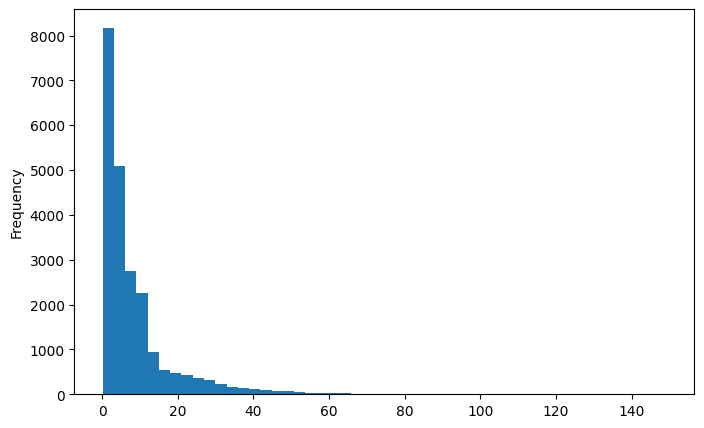

In [17]:
df['score'].plot(kind='hist', bins=50, figsize=(8, 5))

In [18]:
print(df[df['score'] == df['score'].max()]['latitude'])
print(df[df['score'] == df['score'].max()]['longitude'])

10950   -23.590285
Name: latitude, dtype: float64
10950   -46.796949
Name: longitude, dtype: float64


In [19]:
columns = ['tp_sinistro_atropelamento', 'tp_sinistro_colisao_frontal', 'tp_sinistro_colisao_lateral',
       'tp_sinistro_colisao_transversal', 'tp_sinistro_colisao_outros', 'tp_sinistro_choque', 'tp_sinistro_capotamento',
       'tp_sinistro_engavetamento', 'tp_sinistro_tombamento', 'tp_sinistro_outros']

col_sum = df[columns].sum(axis=1)

In [20]:
col_sum.value_counts()

1    14016
2     6722
0     1165
3      638
4       29
5        4
Name: count, dtype: int64

In [21]:
mask = df[columns].sum(axis=1) == 0

df[mask]['tp_sinistro_primario'].value_counts()

tp_sinistro_primario
NAO DISPONIVEL    1165
Name: count, dtype: int64

In [22]:
df.loc[mask, 'tp_sinistro_outros'] = 1

In [23]:
conditions = [
    (df['tp_sinistro_atropelamento'] == 1),
    (df['tp_sinistro_colisao_frontal'] == 1),
    (df['tp_sinistro_capotamento'] == 1),
    (df['tp_sinistro_engavetamento'] == 1),
    (df['tp_sinistro_tombamento'] == 1),
    (df['tp_sinistro_colisao_transversal'] == 1),
    (df['tp_sinistro_colisao_lateral'] == 1),
    (df['tp_sinistro_choque'] == 1),
    (df['tp_sinistro_colisao_outros'] == 1),
    (df['tp_sinistro_outros'] == 1),
]

choices = [
    "ATROPELAMENTO",
    "COLISAO FRONTAL",
    "CAPOTAMENTO",
    "ENGAVETAMENTO",
    "TOMBAMENTO",
    "COLISAO TRANSVERSAL",
    "COLISAO LATERAL",
    "CHOQUE",
    "COLISAO OUTROS",
    "OUTROS"
]

In [24]:
df['tp_sinistro_final'] = np.select(conditions, choices, default = 'OUTROS')

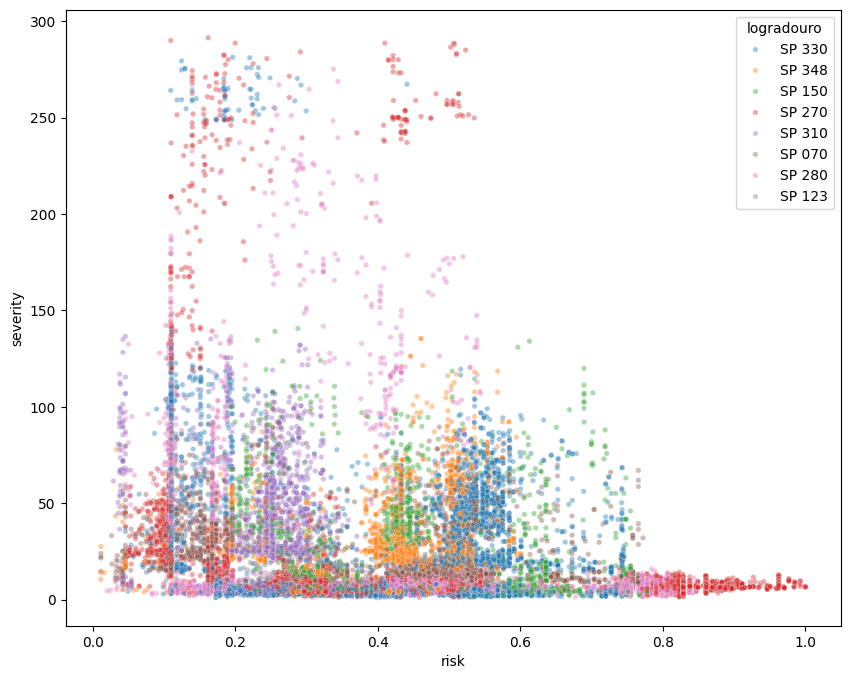

In [76]:
plt.figure(figsize = (10, 8))

sns.scatterplot(
    data=df,
    x='risk',
    y='severity',
    hue='logradouro',
    alpha=0.4,
    s=15
)

plt.show()

In [82]:
logradouros = df['logradouro'].unique()

risks = []
severitys = []
scores = []

for logradouro in logradouros:

    risks.append(df.loc[df['logradouro'] == logradouro, 'risk'].mean())
    severitys.append(df.loc[df['logradouro'] == logradouro, 'severity'].mean())


In [83]:
dfmean = pd.DataFrame()

dfmean['logradouro'] = logradouros
dfmean['riskmean'] = risks
dfmean['severitymean'] = severitys

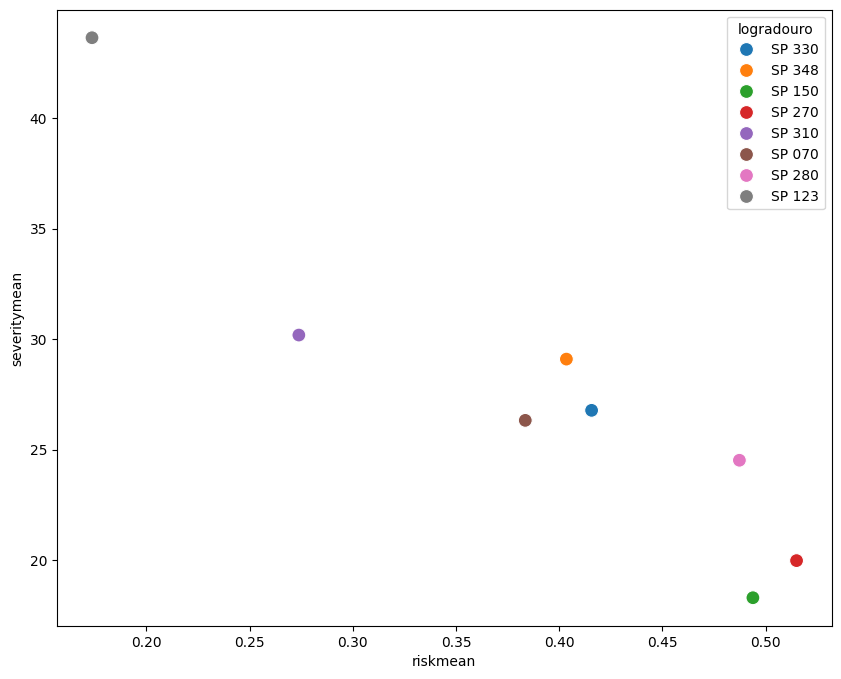

In [84]:
plt.figure(figsize = (10, 8))

sns.scatterplot(
    data=dfmean,
    x='riskmean',
    y='severitymean',
    hue='logradouro',
    alpha=1,
    s=100
)

plt.show()

In [139]:
tab = pd.crosstab(index=df['logradouro'], columns=df['tp_sinistro_final'], normalize='index')
tab = tab * 100

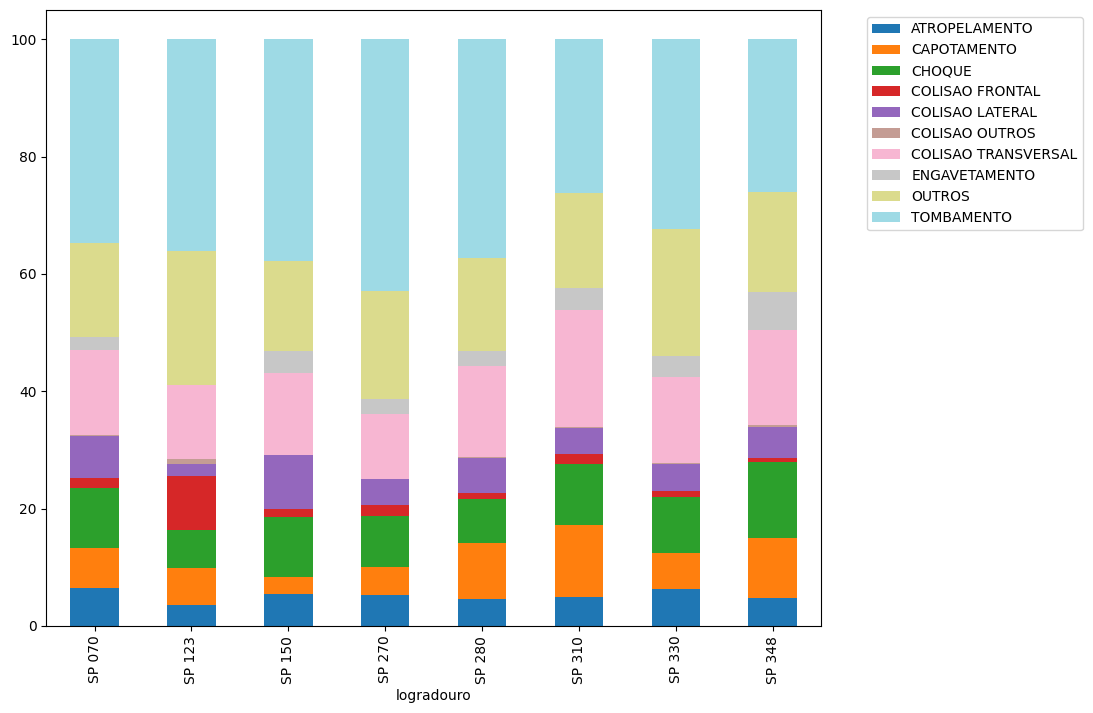

In [140]:
tab.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='tab20')

plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [141]:
tab = pd.crosstab(index=df['concessionaria'], columns=df['tp_sinistro_final'], normalize='index')
tab = tab * 100

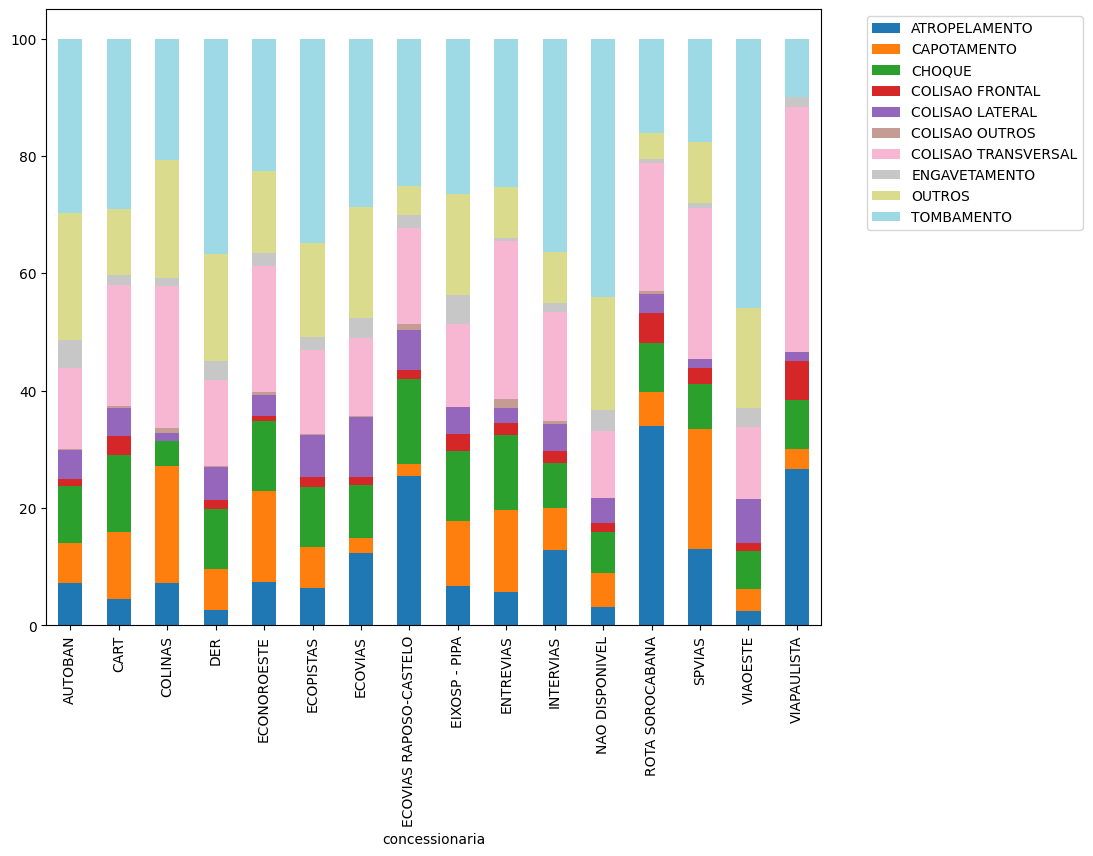

In [142]:
tab.plot(kind='bar', stacked=True, figsize=(10, 8), colormap='tab20')

plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()